## KMeans Clustering Before and After PCA on Cats, Dogs, and Wild Animals

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import normalize
%matplotlib inline

### Data Loading and Preprocessing

In [2]:
# Set up for the different paths
train_path = "data/train"

cat_path = "data/train/cat"
dog_path = "data/train/dog"
wild_path = "data/train/wild"

cat_data = []   # cat pictures
dog_data = []   # dog pictures
wild_data = []  # wild cat/dog pictures

In [3]:
num_cat_data = len([1 for x in list(os.scandir(cat_path)) if x.is_file()])
num_dog_data = len([1 for x in list(os.scandir(dog_path)) if x.is_file()])
num_wild_data = len([1 for x in list(os.scandir(wild_path)) if x.is_file()])

print("Number of cat images:", num_cat_data)
print("Number of dog images:", num_dog_data)
print("Number of wild animal images:", num_wild_data)

Number of cat images: 5153
Number of dog images: 4739
Number of wild animal images: 4738


In [4]:
# Preprocessing

limit = 1000 # taking first 1000 pictures 

for i in os.listdir(cat_path): # all train cat images
    if os.path.isfile(train_path + "/cat/" + i): # check image in file
        cat = cv2.imread(train_path + "/cat/" + i, cv2.IMREAD_GRAYSCALE) # converting to grey scale 
        #cat = cv2.resize(cat, (150, 150)) 
        cat = np.asarray(cat)/255 # bit format
        cat_data.append(cat)
    if len(cat_data) >= limit:
        break
        
for i in os.listdir(dog_path): # all train dog images
    if os.path.isfile(train_path + "/dog/" + i): # check image in file
        dog = cv2.imread(train_path + "/dog/" + i, cv2.IMREAD_GRAYSCALE) # converting to grey scale 
        #dog = cv2.resize(dog, (150, 150)) 
        dog = np.asarray(dog)/255 # bit format
        dog_data.append(dog)
    if len(dog_data) >= limit:
        break
        
       
for i in os.listdir(wild_path): # all train cat images
    if os.path.isfile(train_path + "/wild/" + i): # check image in file
        wild = cv2.imread(train_path + "/wild/" + i, cv2.IMREAD_GRAYSCALE) # converting to grey scale 
        #wild = cv2.resize(wild, (150, 150))
        wild = np.asarray(wild)/255 # bit format
        wild_data.append(wild)
    if len(wild_data) >= limit:
        break


In [5]:
print("Cat Data Dimension:", str(len(cat_data)) + 'x' + str(len(cat_data[0])) + 'x' + str(len(cat_data[0][0])))
print("Dog Data Dimension:", str(len(dog_data)) + 'x' + str(len(dog_data[0])) + 'x' + str(len(dog_data[0][0])))
print("Wild Data Dimension:", str(len(wild_data)) + 'x' + str(len(wild_data[0])) + 'x' + str(len(wild_data[0][0])))

Cat Data Dimension: 1000x512x512
Dog Data Dimension: 1000x512x512
Wild Data Dimension: 1000x512x512


In [6]:
# make all of the images into row vectors
cat_data = np.stack(cat_data, axis = 0)
cat_data = cat_data.reshape(len(cat_data),-1)

dog_data = np.stack(dog_data, axis = 0)
dog_data = dog_data.reshape(len(dog_data),-1)

wild_data = np.stack(wild_data, axis = 0)
wild_data = wild_data.reshape(len(wild_data),-1)

In [7]:
# use transpose to make into column vectors
cat_data = cat_data.T
dog_data = dog_data.T
wild_data = wild_data.T

### PCA

In [8]:
#PCA functions

def eigsort(V, eigvals):
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambda.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape([512, 512], order='A'), cmap=plt.get_cmap('gray'))
    
def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

def runPCA(data):
    '''
    Runs PCA on inputted dataset.
    '''
    mean = np.mean(data, axis = 1, keepdims = True)
    A = data - mean
    eigval, eigvec = np.linalg.eig(A.T @ A)
    V, D = eigsort(eigvec, eigval)

    # calculate matrix of eigenfaces U = Av
    U = A@V
    U = normc(U)

    return mean, U, V, D

def reconstruct_face(data, U, V, idx, pc):
    '''
    Reconstructs one face.
    '''
    # getting principal component coords of 11th cat face in the dataset
    x = data[:, idx][:,None]
    a = x - mean
    c = U.T @ a

    # reconstruct the selected face with principal components
    new_face = U[:,:pc] @ c[:pc,:] + mean

    return new_face
    

def reconstruct_all(data, U, pc):
    '''
    Reconstructs entire dataset.
    '''
    #Reconstruct all cat images using principal components
    data_reduced = []

    for i in range(data.shape[1]):
        x = data[:, i][:,None]
        a = x - mean
        c = U.T @ a
        z = U[:,:pc] @ c[:pc,:] + mean
        data_reduced.append(z)
    
    data_reduced = np.stack(data_reduced, axis = 0)
    data_reduced = data_reduced.reshape(len(data_reduced),-1)

    return data_reduced

def plotScree(D, plot_title):
    #Scree plot to determine necessary number of principal components
    plt.plot(range(len(D)), D.diagonal(), 'o-')
    plt.title('Scree Plot of Eigenvalues for {} Images'.format(plot_title))
    plt.xlabel('Component Number')
    plt.ylabel('Eigenvalues')
    plt.show()

#### PCA for Cat Images

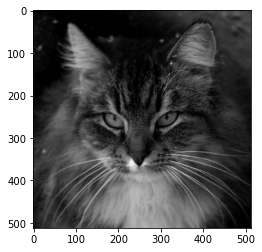

In [9]:
viewcolumn(cat_data[:, 0])

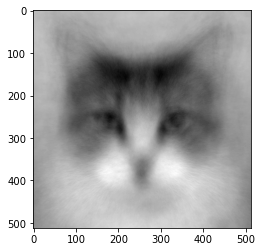

In [10]:
mean, U, V, D = runPCA(cat_data)
viewcolumn(mean)

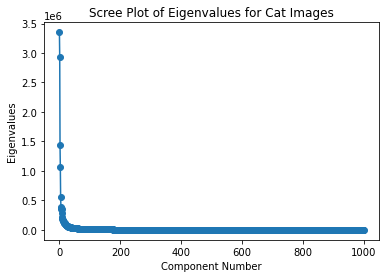

In [11]:
plotScree(D, "Cat")

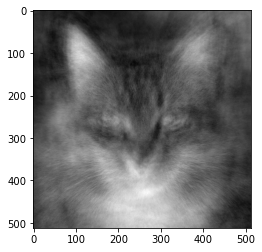

In [12]:
cat_data_pca = reconstruct_all(cat_data, U, pc = 150)
viewcolumn(cat_data_pca[0])

#### PCA for Dog Images

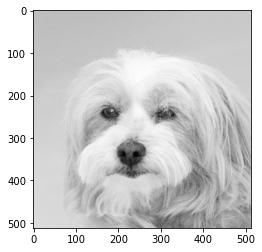

In [13]:
viewcolumn(dog_data[:, 0])

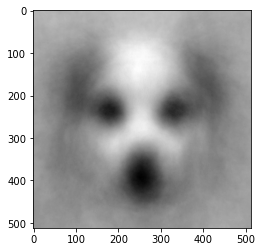

In [14]:
mean, U, V, D = runPCA(dog_data)
viewcolumn(mean)

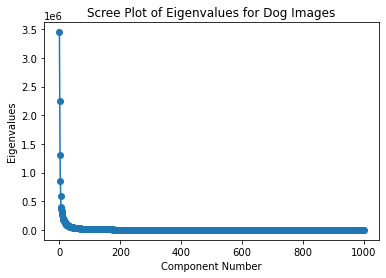

In [15]:
plotScree(D, "Dog")

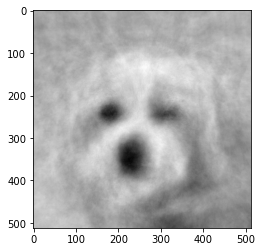

In [16]:
dog_data_pca = reconstruct_all(dog_data, U, pc = 150)
viewcolumn(dog_data_pca[0])

#### PCA for Wild Animal Images

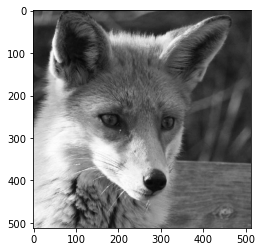

In [17]:
viewcolumn(wild_data[:, 0])

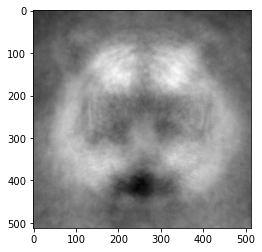

In [18]:
mean, U, V, D = runPCA(wild_data)
viewcolumn(mean)

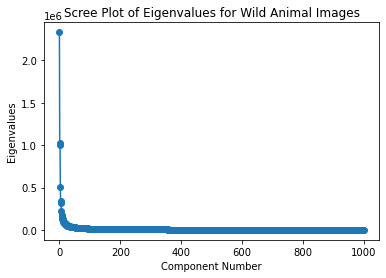

In [19]:
plotScree(D, "Wild Animal")

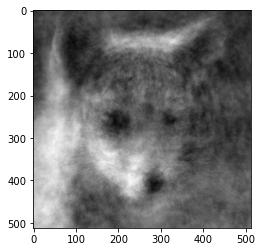

In [20]:
wild_data_pca = reconstruct_all(wild_data, U, pc = 150)
viewcolumn(wild_data_pca[0])

#### PCA for Cats and Dogs

In [21]:
cats_dogs_data = np.concatenate((cat_data, dog_data), axis = 1)

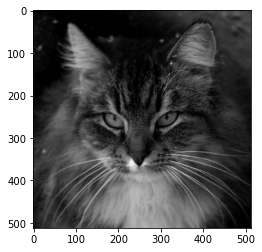

In [22]:
viewcolumn(cats_dogs_data[:, 0])

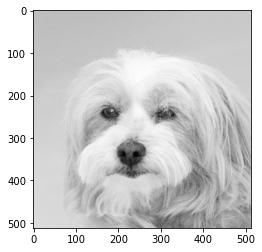

In [23]:
viewcolumn(cats_dogs_data[:, 1000])

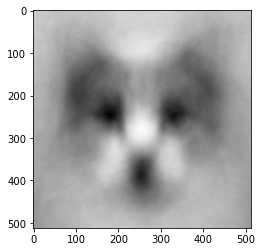

In [24]:
mean, U, V, D = runPCA(cats_dogs_data)
viewcolumn(mean)

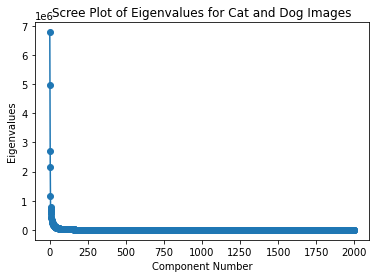

In [25]:
plotScree(D, "Cat and Dog")

In [26]:
cats_dogs_data_pca = reconstruct_all(cats_dogs_data, U, pc = 150)

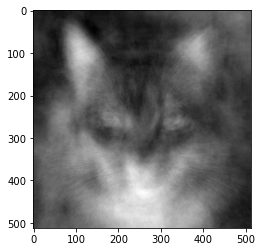

In [27]:
viewcolumn(cats_dogs_data_pca[0])

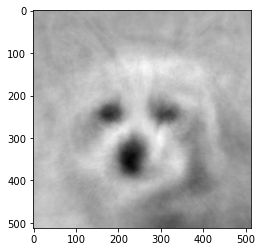

In [28]:
viewcolumn(cats_dogs_data_pca[1000])

#### PCA on All Cats, Dogs, and Wild Animals

In [29]:
all_data = np.concatenate((cat_data, dog_data, wild_data), axis = 1)

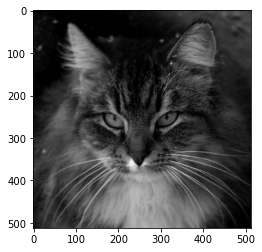

In [30]:
viewcolumn(all_data[:, 0])

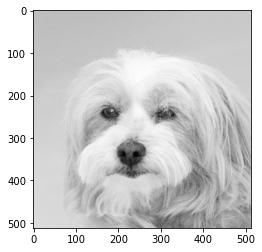

In [31]:
viewcolumn(all_data[:, 1000])

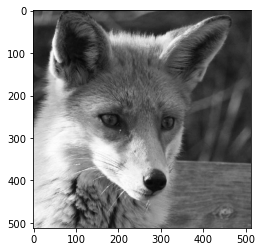

In [32]:
viewcolumn(all_data[:, 2000])

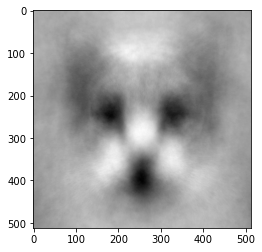

In [33]:
mean, U, V, D = runPCA(all_data)
viewcolumn(mean)

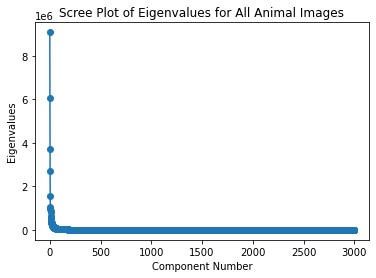

In [34]:
plotScree(D, "All Animal")

In [35]:
all_data_pca = reconstruct_all(all_data, U, pc = 150)

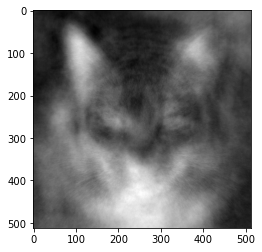

In [36]:
viewcolumn(all_data_pca[0])

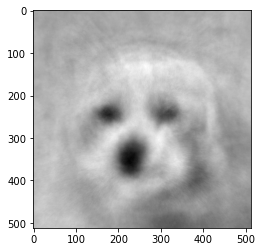

In [37]:
viewcolumn(all_data_pca[1000])

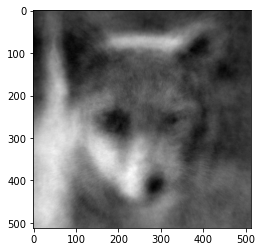

In [38]:
viewcolumn(all_data_pca[2000])

### KMeans Clustering

In [39]:
# KMeans functions
def calcSqDistances(X, Kmus):
    '''
    Calculates the squared distances between the data points and cluster mean locations.
    From Week 5 Discussion.
    
    Parameters:
        X: matrix that contains the data
        Kmus: matrix of the cluster means
    
    Returns:
        sqDmat: matrix containing the squared distances
    '''
    return ((-2 * X.dot(Kmus.T) + np.sum(np.multiply(Kmus, Kmus), axis = 1).T).T + np.sum(np.multiply(X, X), axis = 1)).T
def determineRnk(sqDmat):
    '''
    Determines the closest cluster center for each data vector.

    Parameters:
        sqdMat: matrix containing the squared distances
    
    Returns:
        Rnk: responsibility matrix containing the binary values where 1 is the closest cluster center
    '''
    m = np.argmin(sqDmat, axis = 1)
    return np.eye(sqDmat.shape[1])[m]
def recalcMus(X, Rnk):
    '''
    Recalculates the mu values based on cluster assignments.
    From Week 5 Discussion.
    
    Parameters:
        X: matrix that contains the data
        Rnk: responsibility matrix containing the binary values where 1 is the closest cluster center
    
    Returns:
        Kmus: recalculated mean values matrix
    '''
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk, axis = 0))).T
def runKMeans(K, data):
    '''
    Performs the KMeans algorithm.
    
    Parameters:
        K: number of cluster
        data: images x number of pixels matrix
    
    Returns:
        Kmus: cluster location matrix
    '''
    X = data
    N, D = X.shape
    Kmus = np.zeros((K, D))
    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]
    for iter in range(1000):
        sqDmat = calcSqDistances(X, Kmus)
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus
        Kmus = recalcMus(X, Rnk)
        if np.sum(np.abs(KmusOld.reshape((-1, 1)) - Kmus.reshape((-1, 1)))) < 1e-6:
            break
    return Kmus
def get_cluster_plot(Kmus, rows, cols): 
    '''
    Gets a plot of what different clusters represent.
    
    Parameters:
        Kmus: cluster location matrix
        rows: number of subplot rows
        
    Returns:
        Cluster plots
    '''
    fig,axs = plt.subplots(rows, cols, figsize = (15,9), constrained_layout=True)
    for i in range(len(Kmus)):
        cluster = Kmus[i].reshape(512,-1) * 255
        if rows == 1:
            axs[i%cols].imshow(cluster, cmap = plt.cm.binary)
            axs[i%cols].set_title(f'Cluster {i + 1}')
        elif cols == 1:
            axs[i].imshow(cluster, cmap = plt.cm.binary)
            axs[i].set_title(f'Cluster {i + 1}')
        else:
            axs[i//cols][i%cols].imshow(cluster, cmap = plt.cm.binary)
            axs[i//cols][i%cols].set_title(f'Cluster {i + 1}')

#### KMeans Clustering on Cat Images before and after PCA

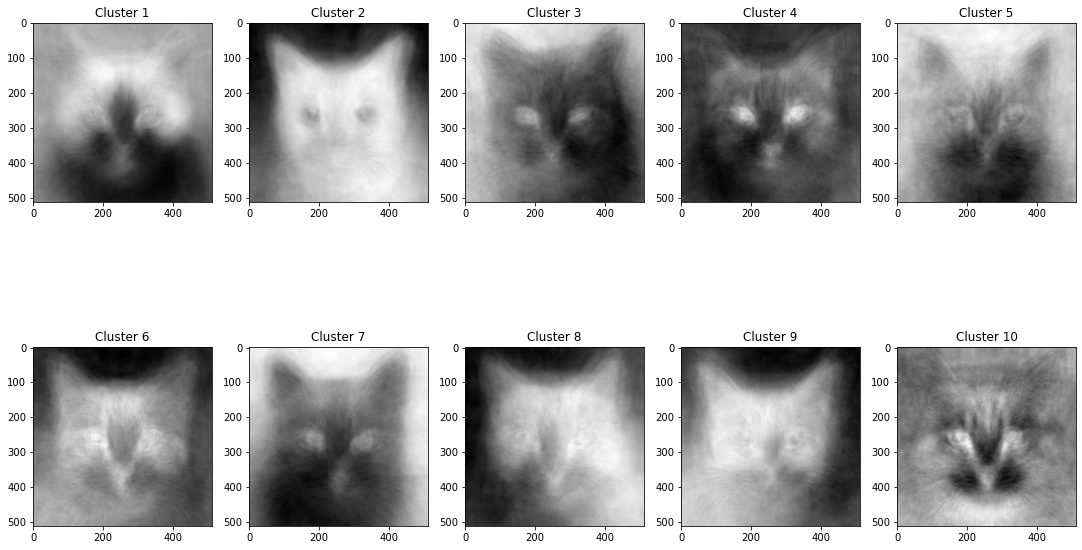

In [40]:
Kmus = runKMeans(10, cat_data.T)
get_cluster_plot(Kmus, 2, 5)

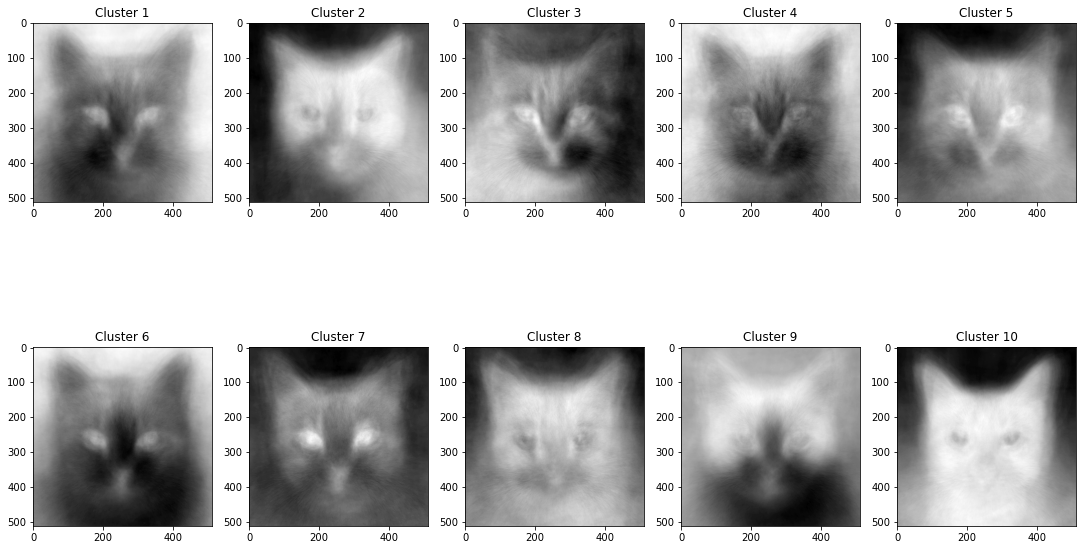

In [41]:
Kmus = runKMeans(10, cat_data_pca)
get_cluster_plot(Kmus, 2, 5)

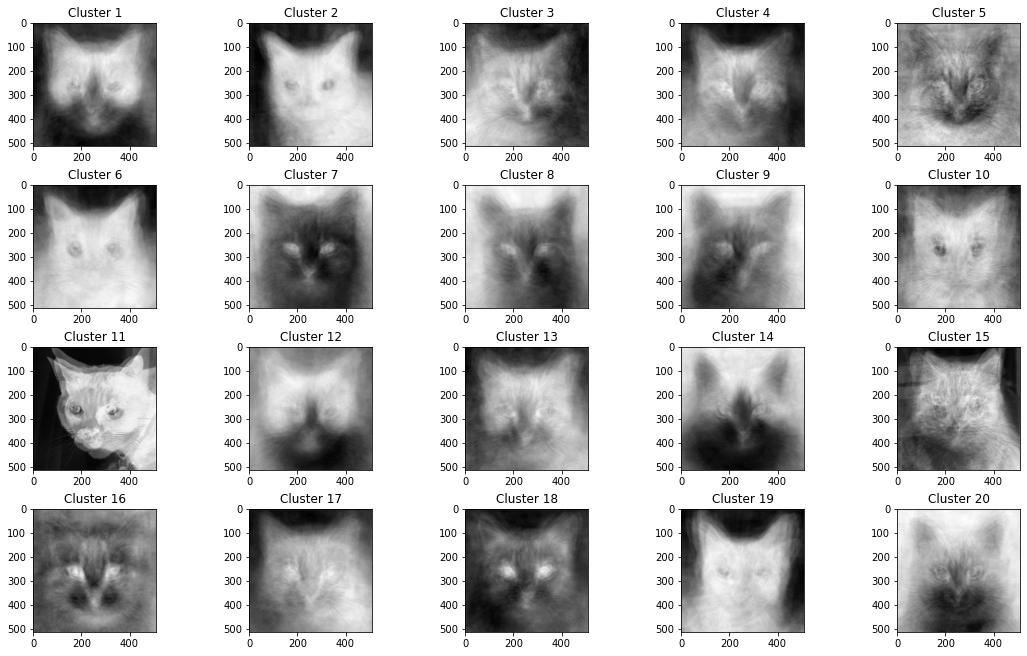

In [42]:
Kmus = runKMeans(20, cat_data.T)
get_cluster_plot(Kmus, 4, 5)

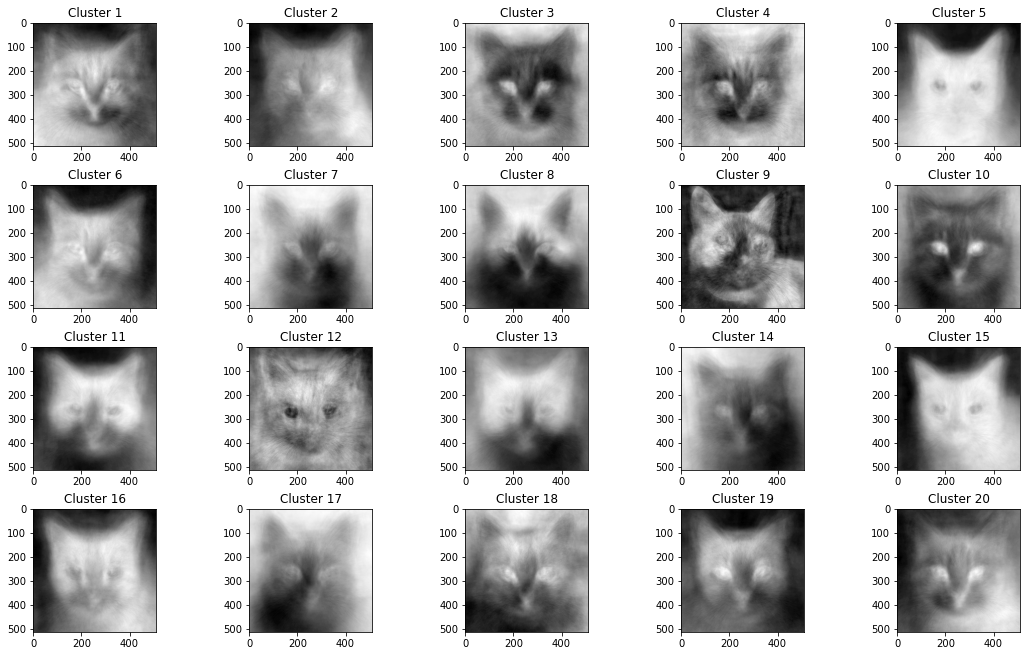

In [43]:
Kmus = runKMeans(20, cat_data_pca)
get_cluster_plot(Kmus, 4, 5)

#### KMeans Clustering on Dog Images before and after PCA

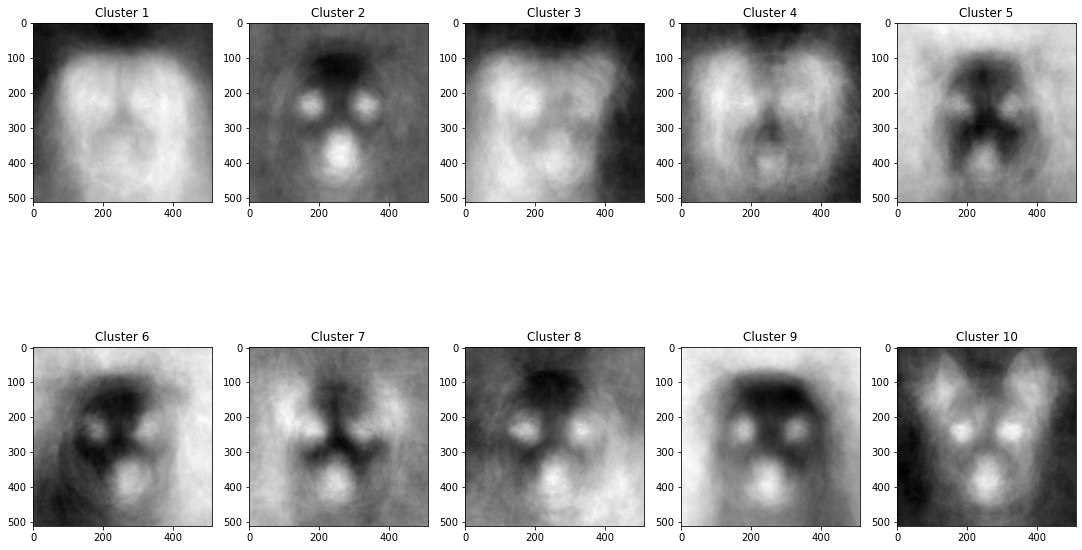

In [44]:
Kmus = runKMeans(10, dog_data.T)
get_cluster_plot(Kmus, 2, 5)

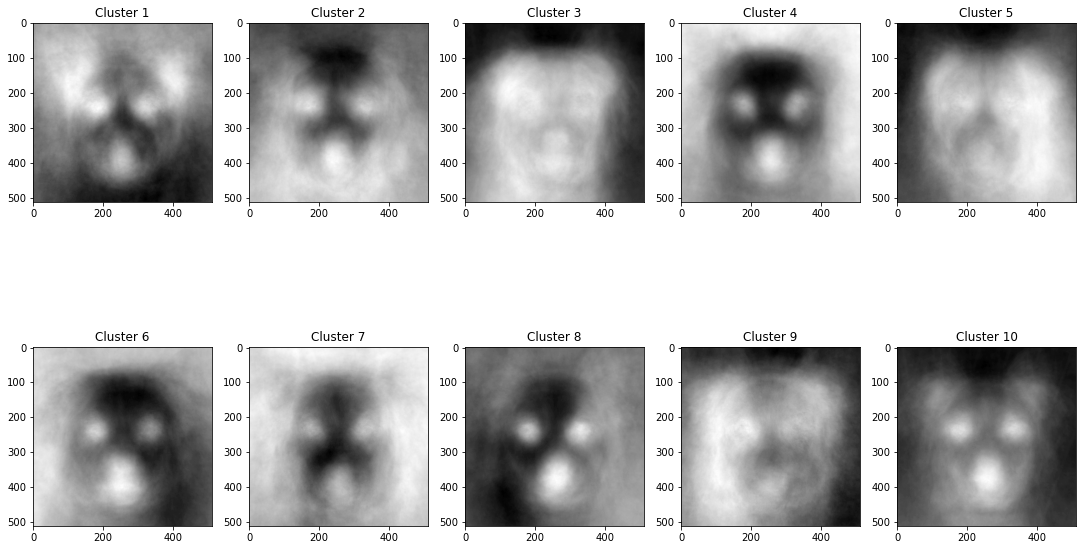

In [45]:
Kmus = runKMeans(10, dog_data_pca)
get_cluster_plot(Kmus, 2, 5)

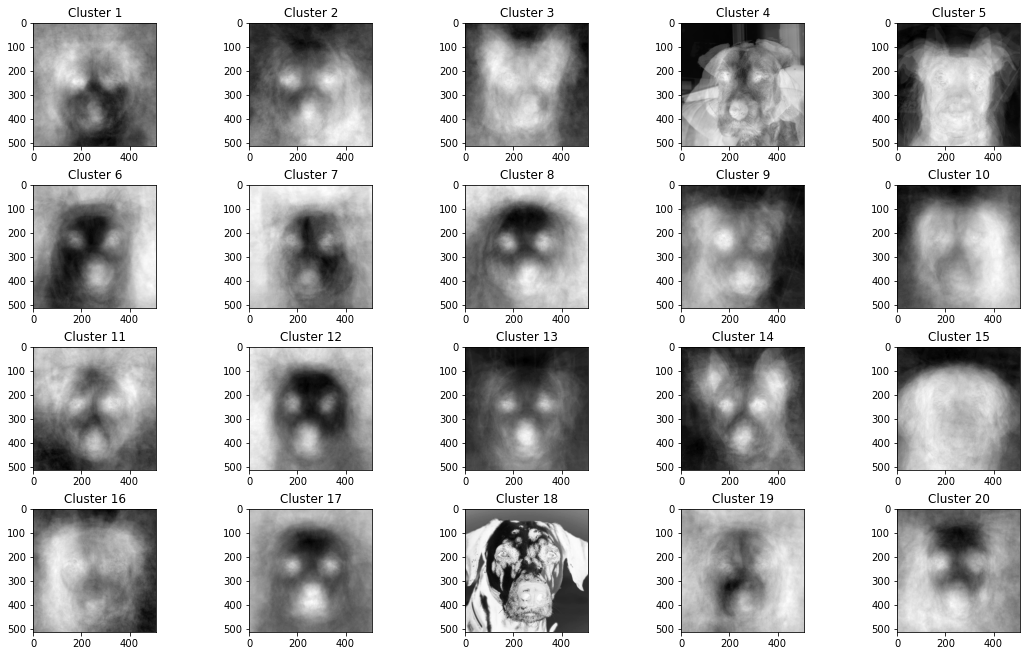

In [46]:
Kmus = runKMeans(20, dog_data.T)
get_cluster_plot(Kmus, 4, 5)

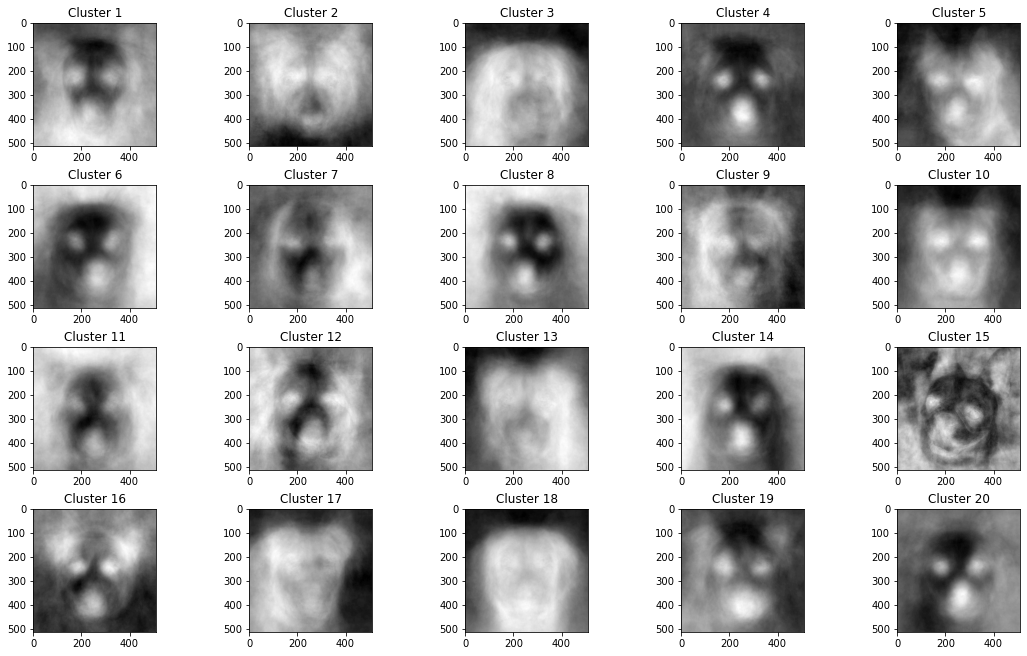

In [47]:
Kmus = runKMeans(20, dog_data_pca)
get_cluster_plot(Kmus, 4, 5)

#### KMeans Clustering on Wild Animal Images before and after PCA

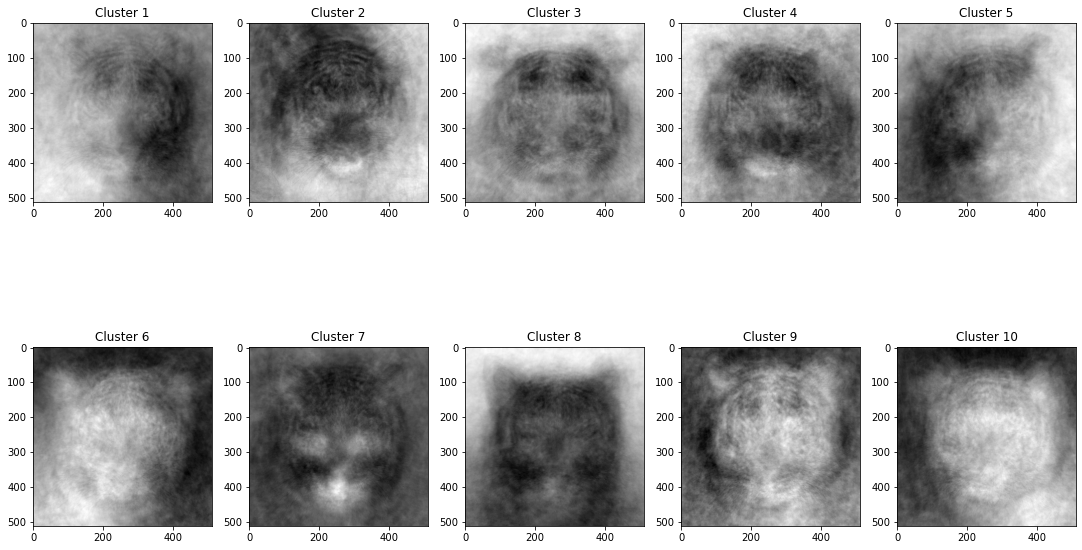

In [48]:
Kmus = runKMeans(10, wild_data.T)
get_cluster_plot(Kmus, 2, 5)

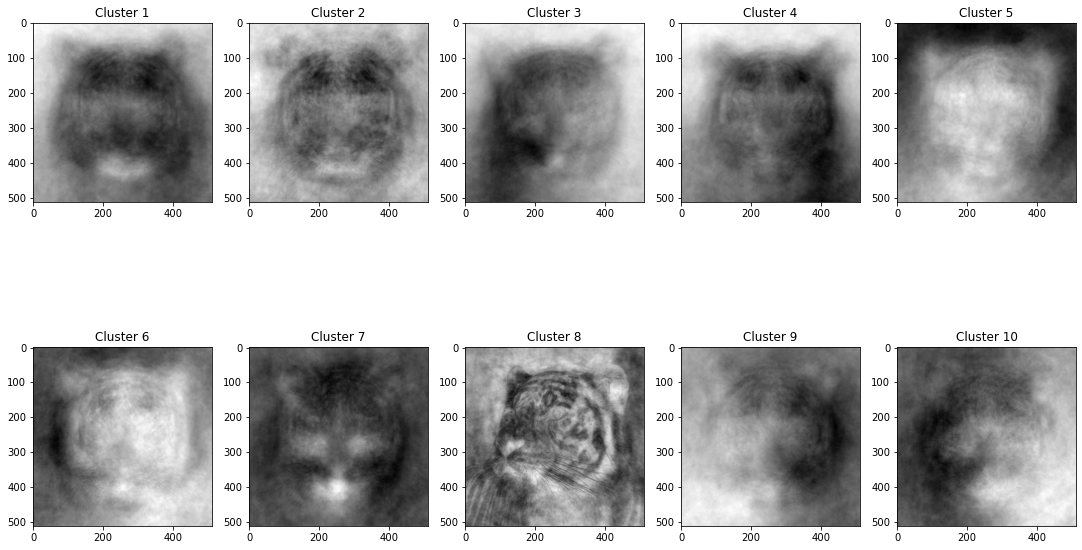

In [49]:
Kmus = runKMeans(10, wild_data_pca)
get_cluster_plot(Kmus, 2, 5)

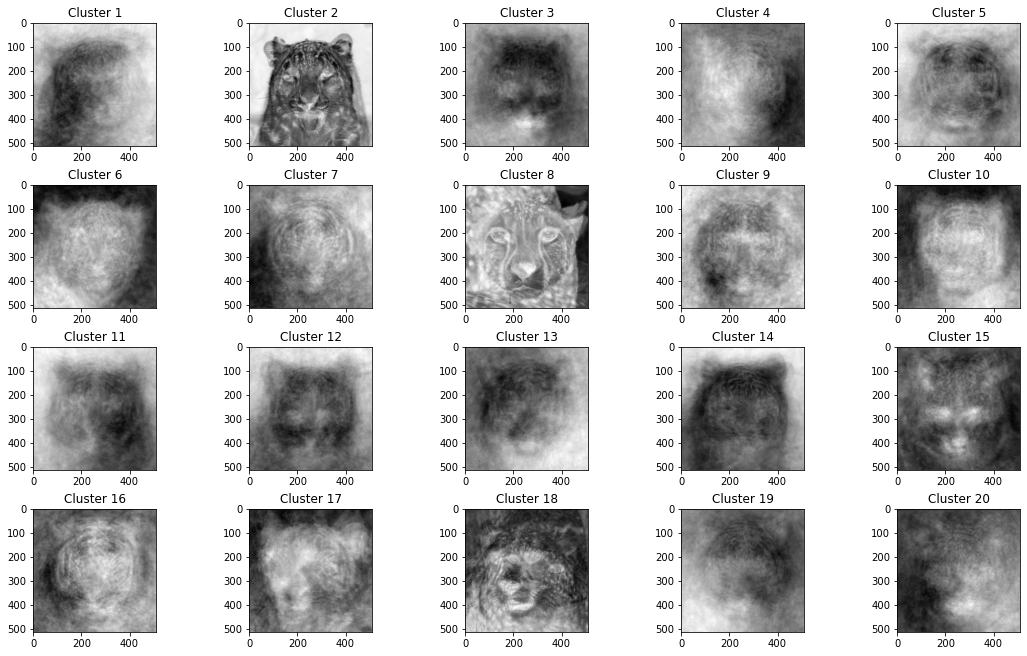

In [50]:
Kmus = runKMeans(20, wild_data.T)
get_cluster_plot(Kmus, 4, 5)

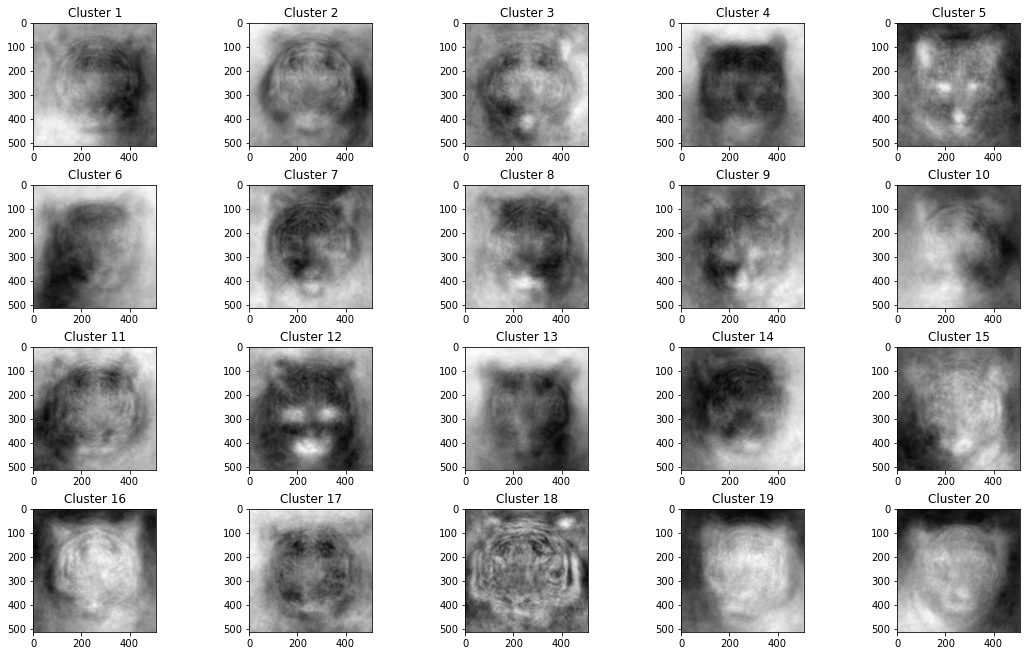

In [51]:
Kmus = runKMeans(20, wild_data_pca)
get_cluster_plot(Kmus, 4, 5)

#### KMeans Clustering on Cat and Dog Images before and after PCA

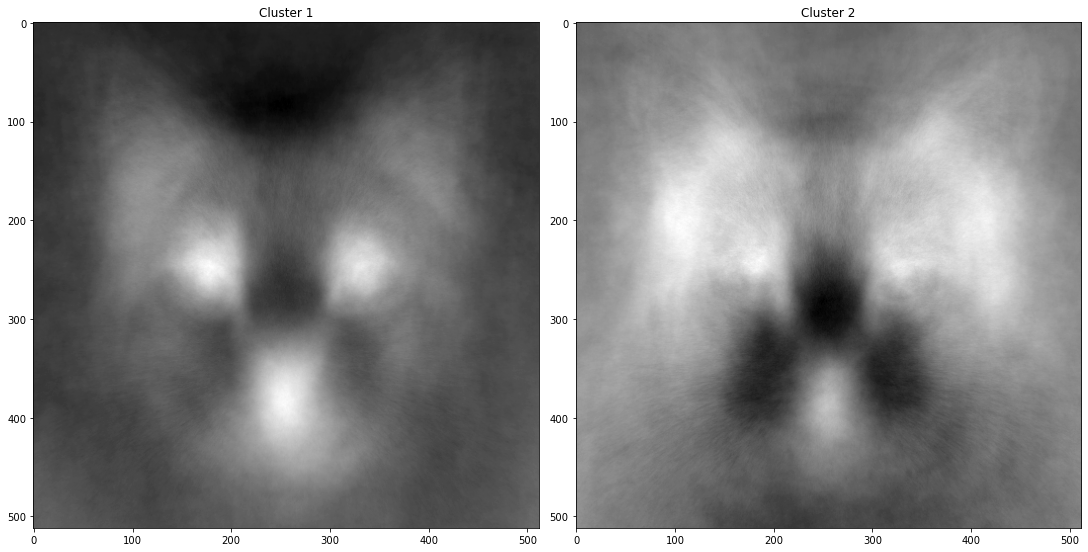

In [52]:
Kmus = runKMeans(2, cats_dogs_data.T)
get_cluster_plot(Kmus, 1, 2)

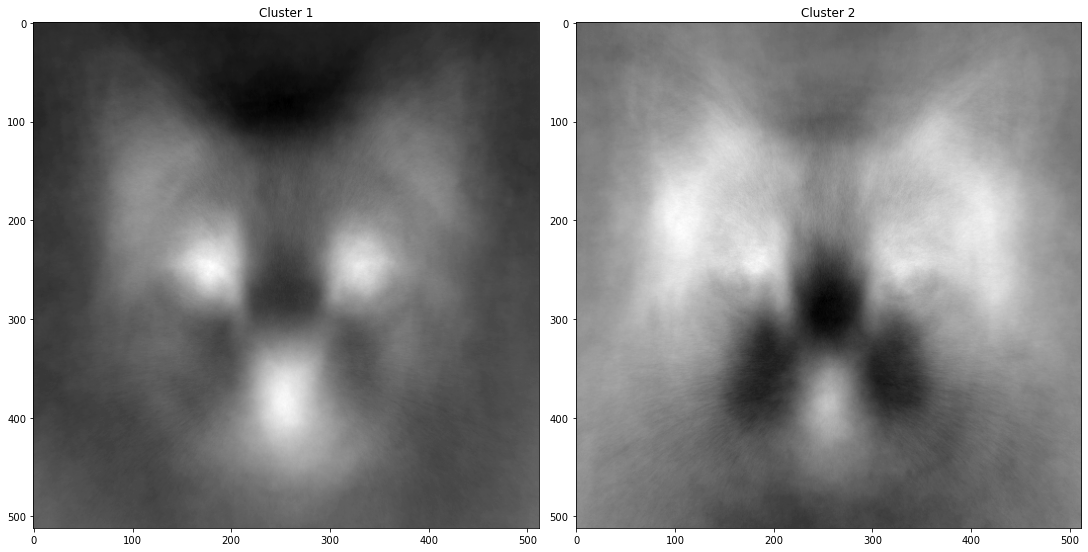

In [53]:
Kmus = runKMeans(2, cats_dogs_data_pca)
get_cluster_plot(Kmus, 1, 2)

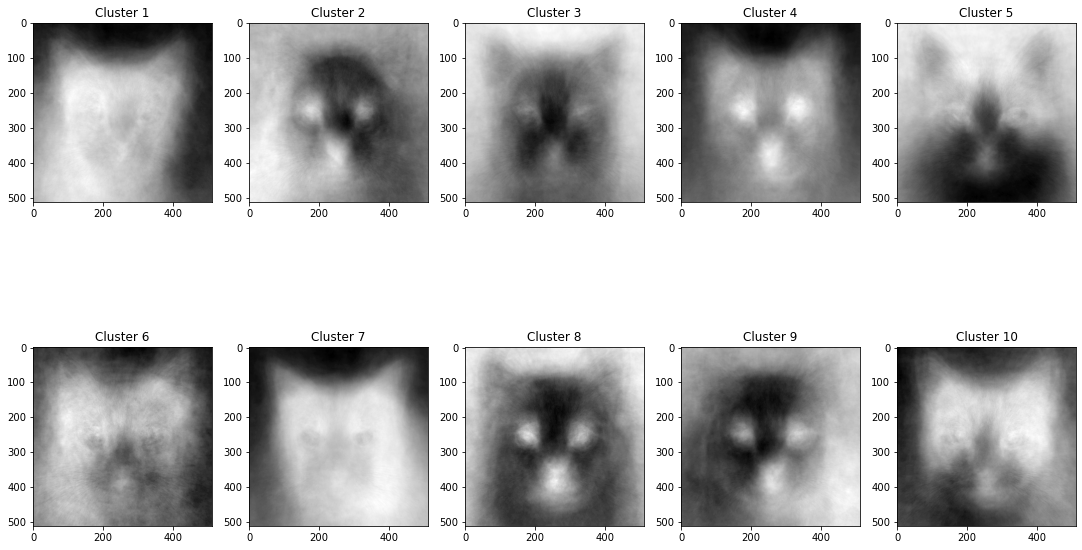

In [54]:
Kmus = runKMeans(10, cats_dogs_data.T)
get_cluster_plot(Kmus, 2, 5)

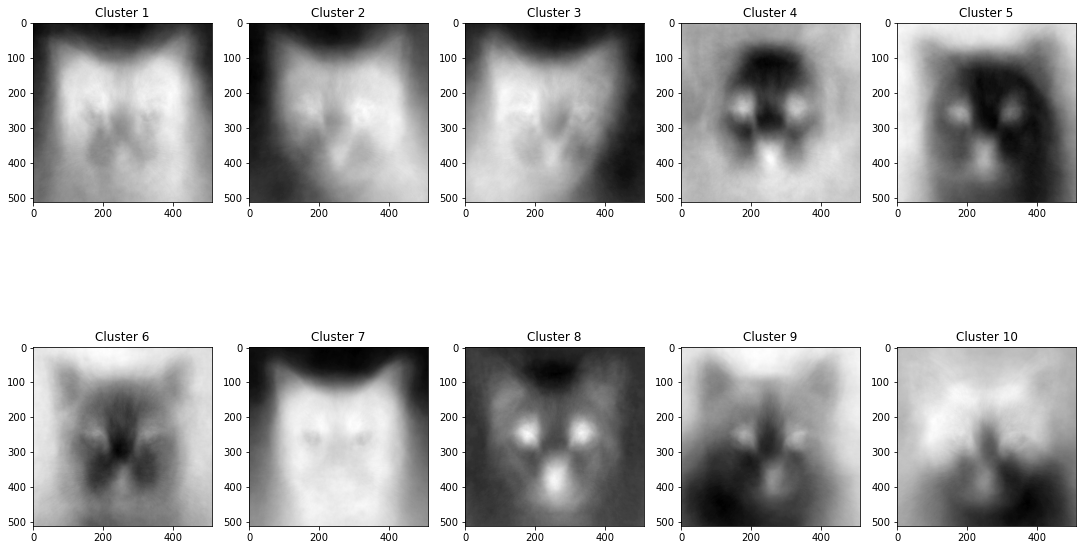

In [55]:
Kmus = runKMeans(10, cats_dogs_data_pca)
get_cluster_plot(Kmus, 2, 5)

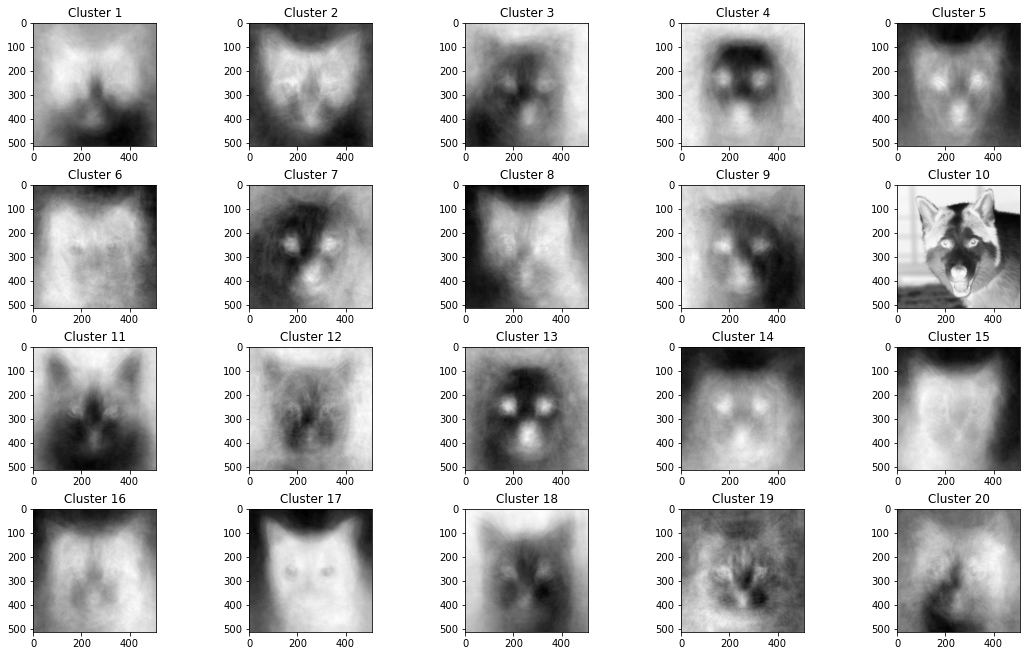

In [56]:
Kmus = runKMeans(20, cats_dogs_data.T)
get_cluster_plot(Kmus, 4, 5)

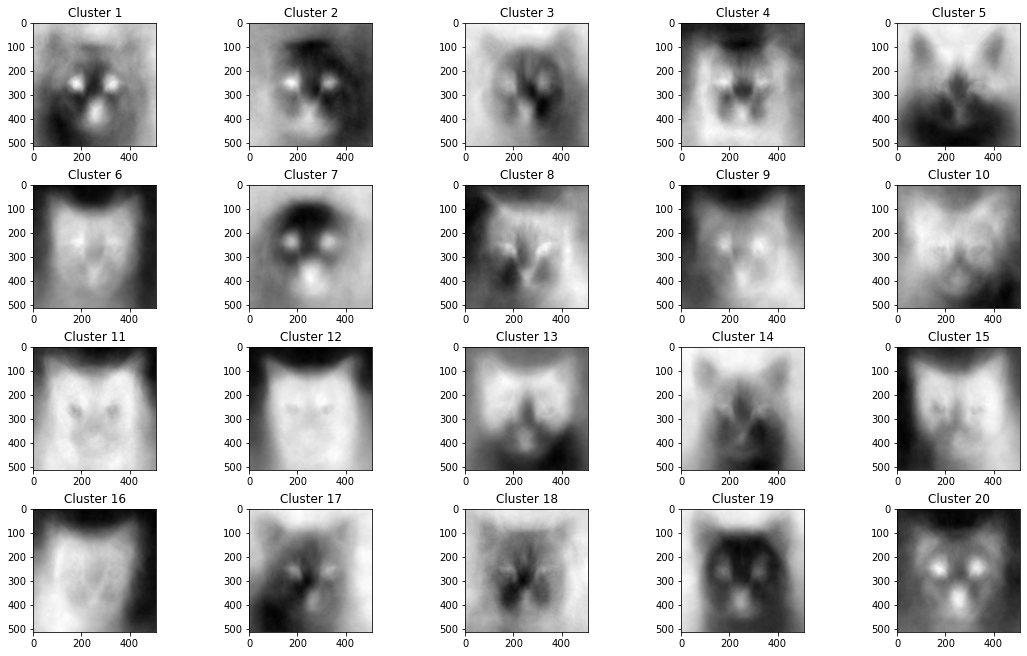

In [57]:
Kmus = runKMeans(20, cats_dogs_data_pca)
get_cluster_plot(Kmus, 4, 5)

#### KMeans Clustering on All Animal Images before and after PCA

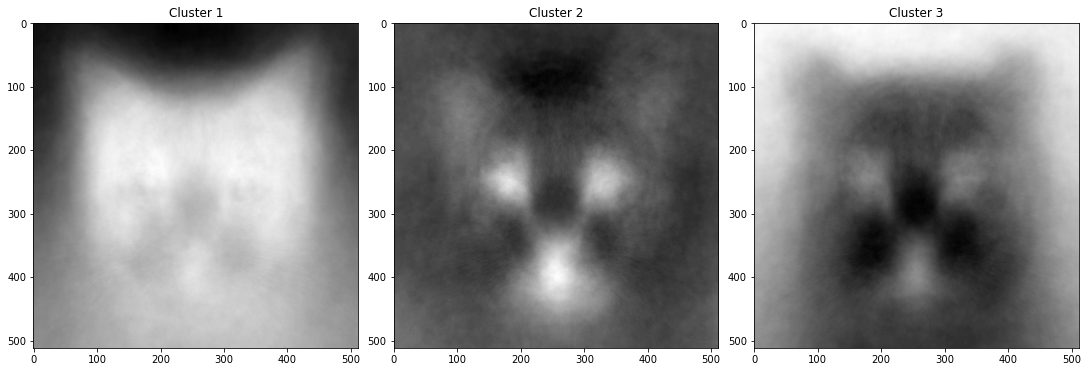

In [58]:
Kmus = runKMeans(3, all_data.T)
get_cluster_plot(Kmus, 1, 3)

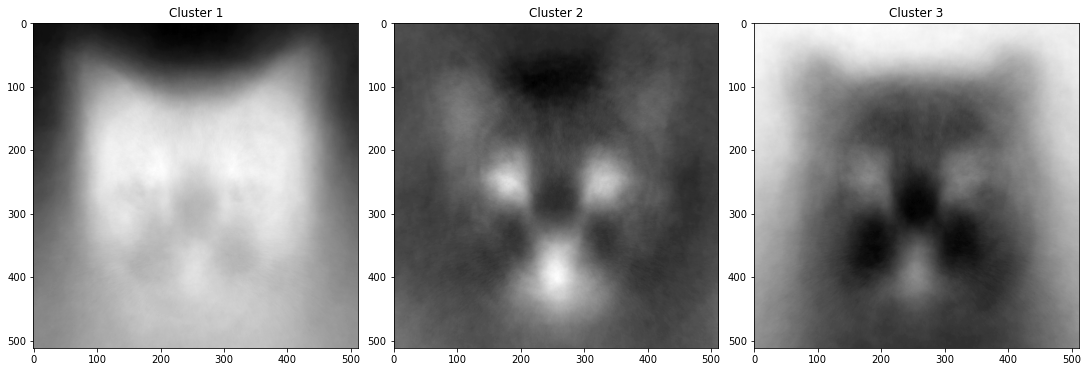

In [59]:
Kmus = runKMeans(3, all_data_pca)
get_cluster_plot(Kmus, 1, 3)

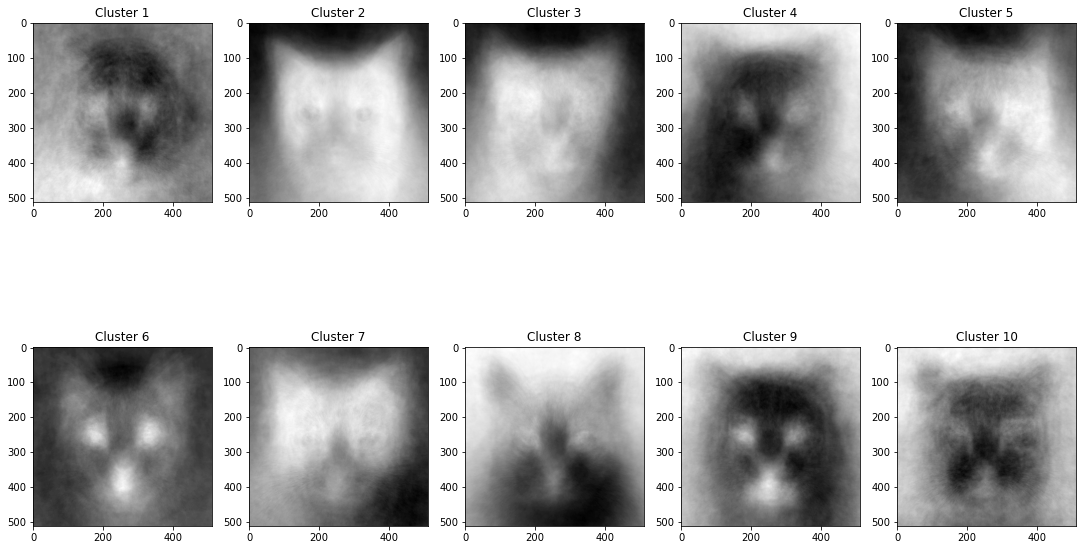

In [60]:
Kmus = runKMeans(10, all_data.T)
get_cluster_plot(Kmus, 2, 5)

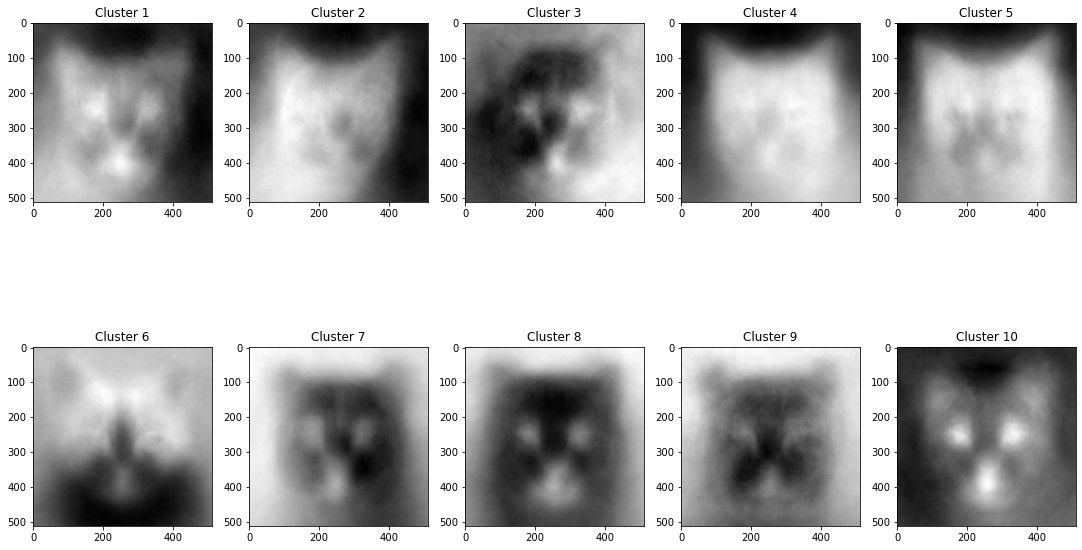

In [61]:
Kmus = runKMeans(10, all_data_pca)
get_cluster_plot(Kmus, 2, 5)

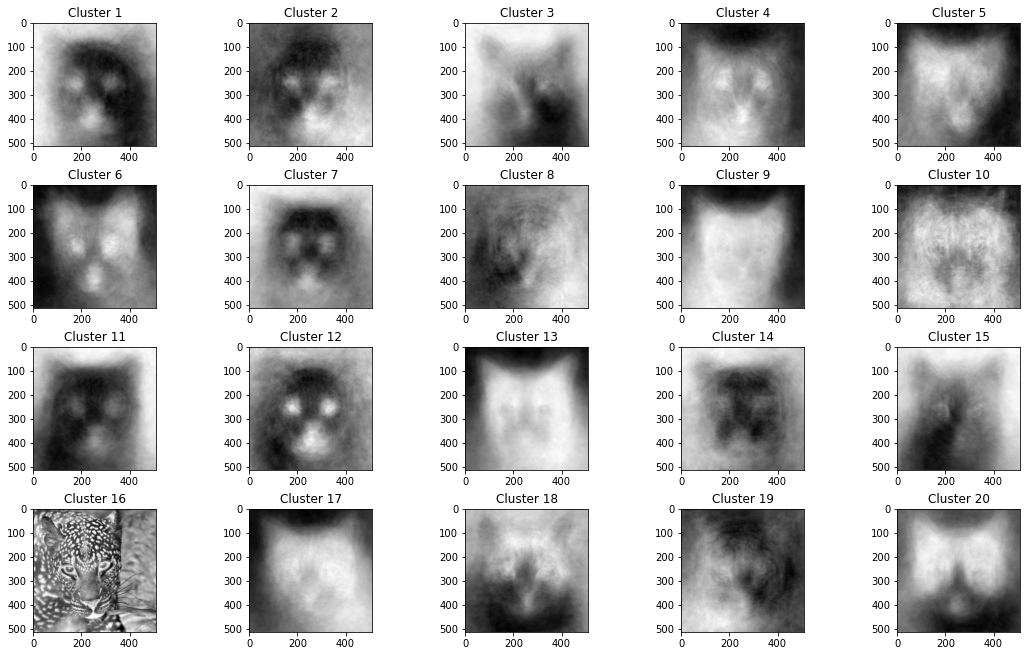

In [62]:
Kmus = runKMeans(20, all_data.T)
get_cluster_plot(Kmus, 4, 5)

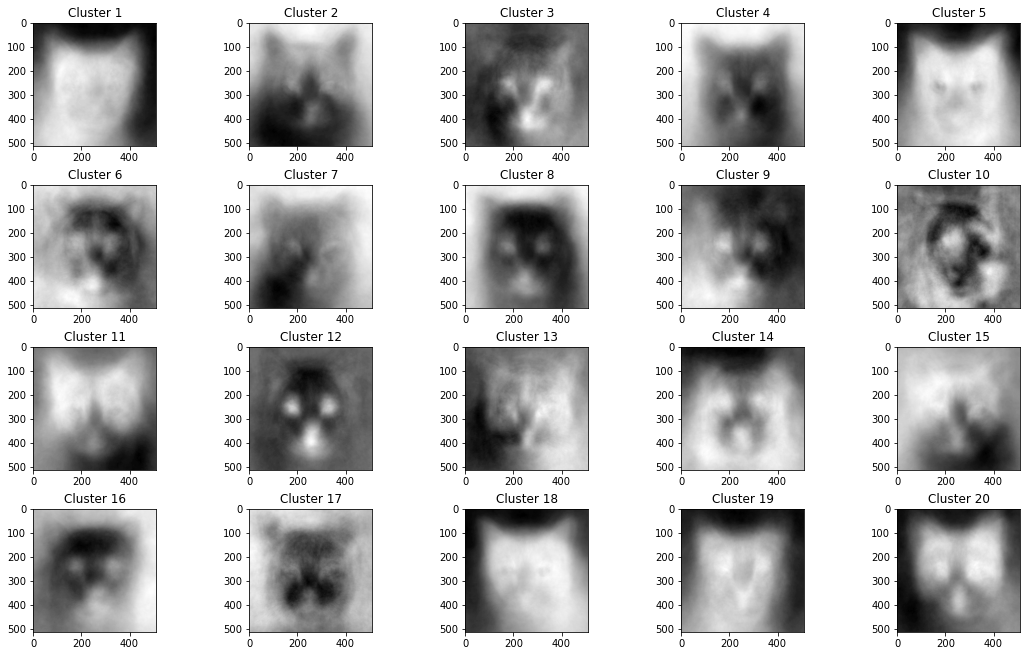

In [63]:
Kmus = runKMeans(20, all_data_pca)
get_cluster_plot(Kmus, 4, 5)